In [59]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectFromModel

In [2]:
random_state=42
cross_validation_folds = 5
n_jobs = 2
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [42]:
print('*'*40, "train")
print(train_df.info())
print('*'*40, 'test')
print(test_df.info())

**************************************** train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd    

In [39]:
dict(zip(train_df['RoofMatl'].cat.categories, range(len(combined['RoofMatl'].cat.categories))))
train_df['RoofMatl'].astype('category').cat.categories

Index(['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake',
       'WdShngl'],
      dtype='object')

In [45]:
print('train', train_df.shape)
print('test', test_df.shape)
train_df.LotArea.mode()[0]

train (1460, 75)
test (1459, 80)


7200

In [47]:
random_state=42
cross_validation_folds = 5
n_jobs = 2
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
test_ids = test_df.Id
y = train_df.SalePrice
train_df.drop(['SalePrice'], inplace=True, axis=1)
combine = [train_df, test_df]
combined = pd.concat([train_df, test_df])
train_df.replace(['NaN', 'NA', 'nan'], np.nan, inplace=True)
test_df.replace(['NaN', 'NA', 'nan'], np.nan, inplace=True)
def fill_column_with_median_value(df, column):
    """
    fill numerical columns with median value
    fill categorial columns with most common values
    """
    if df[column].dtype=='float64':
        median_value = combined[column][combined[column].notnull()].median()
    elif df[column].dtype=='object':
        median_value = combined[column][combined[column].notnull()].mode()[0]
    else:
        print('-- fuck --'* 40)
    print(f'default value for column {column} = {median_value}')
    print('--- unique values', df[column].fillna(median_value).unique())
    df[column] = df[column].fillna(median_value)
    still_has_null_value = df[column][df[column].isnull()].size>0
    print(f'still has null value? {still_has_null_value}')
def find_columns_with_na_values(df):
    for column in df.columns:
        if df.loc[df[column].isnull()].size>0:
            yield column
for dataset in combine:
    dataset.drop(['Id', 'Alley', 'PoolQC', 'MiscFeature', 'Fence'], inplace=True, axis=1)
    for column in find_columns_with_na_values(dataset):
        print('column with null values ---', column, dataset[column].dtype)
        fill_column_with_median_value(dataset, column)
X = pd.get_dummies(train_df)
X_test = pd.get_dummies(test_df)
missing_cols = set( X.columns ) - set( X_test.columns )
print("\tmissing columns", missing_cols)
print('drop missing columns')
# for column in missing_cols:
#     X.drop(column, inplace=True, axis=1)
print('X shape', X.shape)
print('X_test shape', X_test.shape)

column with null values --- LotFrontage float64
default value for column LotFrontage = 68.0
--- unique values [ 65.  80.  68.  60.  84.  85.  75.  51.  50.  70.  91.  72.  66. 101.
  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52. 100.
  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40. 105.
  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92. 134.
  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.  93.
  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.  36.
  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39. 144.
 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
still has null value? False
column with null values --- MasVnrType object
default value for column MasVnrType = None
--- unique values ['BrkFace' 'None' 'Stone' 'BrkCmn']
still has null value? False
column with null values --- MasVnrArea float64
default value for column MasVnrArea = 0.0
--- unique values [1.960e+02 0.000e+00 1.62

--- unique values ['Typ' 'Min2' 'Min1' 'Mod' 'Maj1' 'Sev' 'Maj2']
still has null value? False
column with null values --- FireplaceQu object
default value for column FireplaceQu = Gd
--- unique values ['Gd' 'TA' 'Po' 'Fa' 'Ex']
still has null value? False
column with null values --- GarageType object
default value for column GarageType = Attchd
--- unique values ['Attchd' 'Detchd' 'BuiltIn' 'Basment' '2Types' 'CarPort']
still has null value? False
column with null values --- GarageYrBlt float64
default value for column GarageYrBlt = 1979.0
--- unique values [1961. 1958. 1997. 1998. 1992. 1993. 1990. 1970. 1999. 1971. 1975. 2009.
 2005. 2003. 2002. 2006. 2004. 1920. 1974. 2000. 2010. 1967. 1978. 1966.
 1964. 1979. 1994. 1949. 1959. 1956. 1952. 1955. 1989. 1950. 1960. 1963.
 1900. 1957. 1938. 1948. 1962. 1928. 1930. 1926. 1939. 1973. 1942. 1923.
 1915. 1917. 1940. 1910. 1969. 1968. 1977. 1945. 1987. 1947. 1954. 1941.
 1951. 1896. 1976. 2008. 2007. 1965. 2001. 1972. 1984. 1985. 1996. 1995

In [27]:
train_df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no

In [8]:
train_df.FireplaceQu

0        Gd
1        TA
2        TA
3        Gd
4        TA
5       NaN
6        Gd
7        TA
8        TA
9        TA
10      NaN
11       Gd
12      NaN
13       Gd
14       Fa
15      NaN
16       TA
17      NaN
18      NaN
19      NaN
20       Gd
21       Gd
22       Gd
23       TA
24       TA
25       Gd
26      NaN
27       Gd
28       Gd
29      NaN
       ... 
1430     Gd
1431    NaN
1432    NaN
1433     TA
1434     Gd
1435     Gd
1436    NaN
1437     Gd
1438    NaN
1439     TA
1440     Gd
1441     TA
1442     Ex
1443     Gd
1444    NaN
1445    NaN
1446    NaN
1447     TA
1448    NaN
1449    NaN
1450    NaN
1451     Gd
1452    NaN
1453    NaN
1454    NaN
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object

In [48]:
categorical_columns = list(filter(lambda col: train_df[col].dtype=='object', list(train_df.columns)))
mapping = dict()
# get the mapping between column labels to values
for column in categorical_columns:
    combined[column] = combined[column].astype('category')
    mapping[column] = dict(zip(combined[column].cat.categories, range(len(combined[column].cat.categories))))
print(mapping)
for dataset in combine:
    dataset.replace(mapping, inplace=True)
print(train_df.shape, test_df.shape)

{'MSZoning': {'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4}, 'Street': {'Grvl': 0, 'Pave': 1}, 'LotShape': {'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3}, 'LandContour': {'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3}, 'Utilities': {'AllPub': 0, 'NoSeWa': 1}, 'LotConfig': {'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4}, 'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2}, 'Neighborhood': {'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5, 'Crawfor': 6, 'Edwards': 7, 'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11, 'NAmes': 12, 'NPkVill': 13, 'NWAmes': 14, 'NoRidge': 15, 'NridgHt': 16, 'OldTown': 17, 'SWISU': 18, 'Sawyer': 19, 'SawyerW': 20, 'Somerst': 21, 'StoneBr': 22, 'Timber': 23, 'Veenker': 24}, 'Condition1': {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'PosA': 3, 'PosN': 4, 'RRAe': 5, 'RRAn': 6, 'RRNe': 7, 'RRNn': 8}, 'Condition2': {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'PosA': 3, 'PosN': 4, 'RRAe': 5, 'RRAn': 6, 'RRNn': 7}, 'BldgType': {'1Fam': 0, '2fmCo

In [6]:
train_df.to_csv("train_df_processed.csv")

## Apply baseline model - Random Forest

In [11]:
? pd.fillna

Object `pd.fillna` not found.


In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null int64
Condition1       1460 non-null int64
Condition2       1460 non-null int64
BldgType         1460 non-null int64
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int64
RoofMatl         1460 non-null int64
Exterior1st      1460 non-null int64
Exterior2nd      1460 non-null int64
MasVnrType       1460 non-null int64
Mas

In [52]:
rdf = GradientBoostingRegressor()
cv = cross_val_score(rdf, train_df, y, cv=cross_validation_folds, n_jobs=n_jobs, verbose=1)
print("baseline model with random forest, performance = {}".format(cv))
rdf.fit(train_df, y)

[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.8s finished


baseline model with random forest, performance = [0.90510716 0.84112726 0.89661857 0.9028348  0.88967153]


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

** before reduced = [0.90510716 0.84112726 0.89661857 0.9028348  0.88967153]
reduced shape (1460, 22) (1459, 22)


/Users/kdang/.virtualenvs/tensorflow/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.5s finished


baseline model with random forest, performance = [0.90893548 0.854222   0.89651126 0.89455615 0.89566519]
** after reduced = [0.90893548 0.854222   0.89651126 0.89455615 0.89566519]


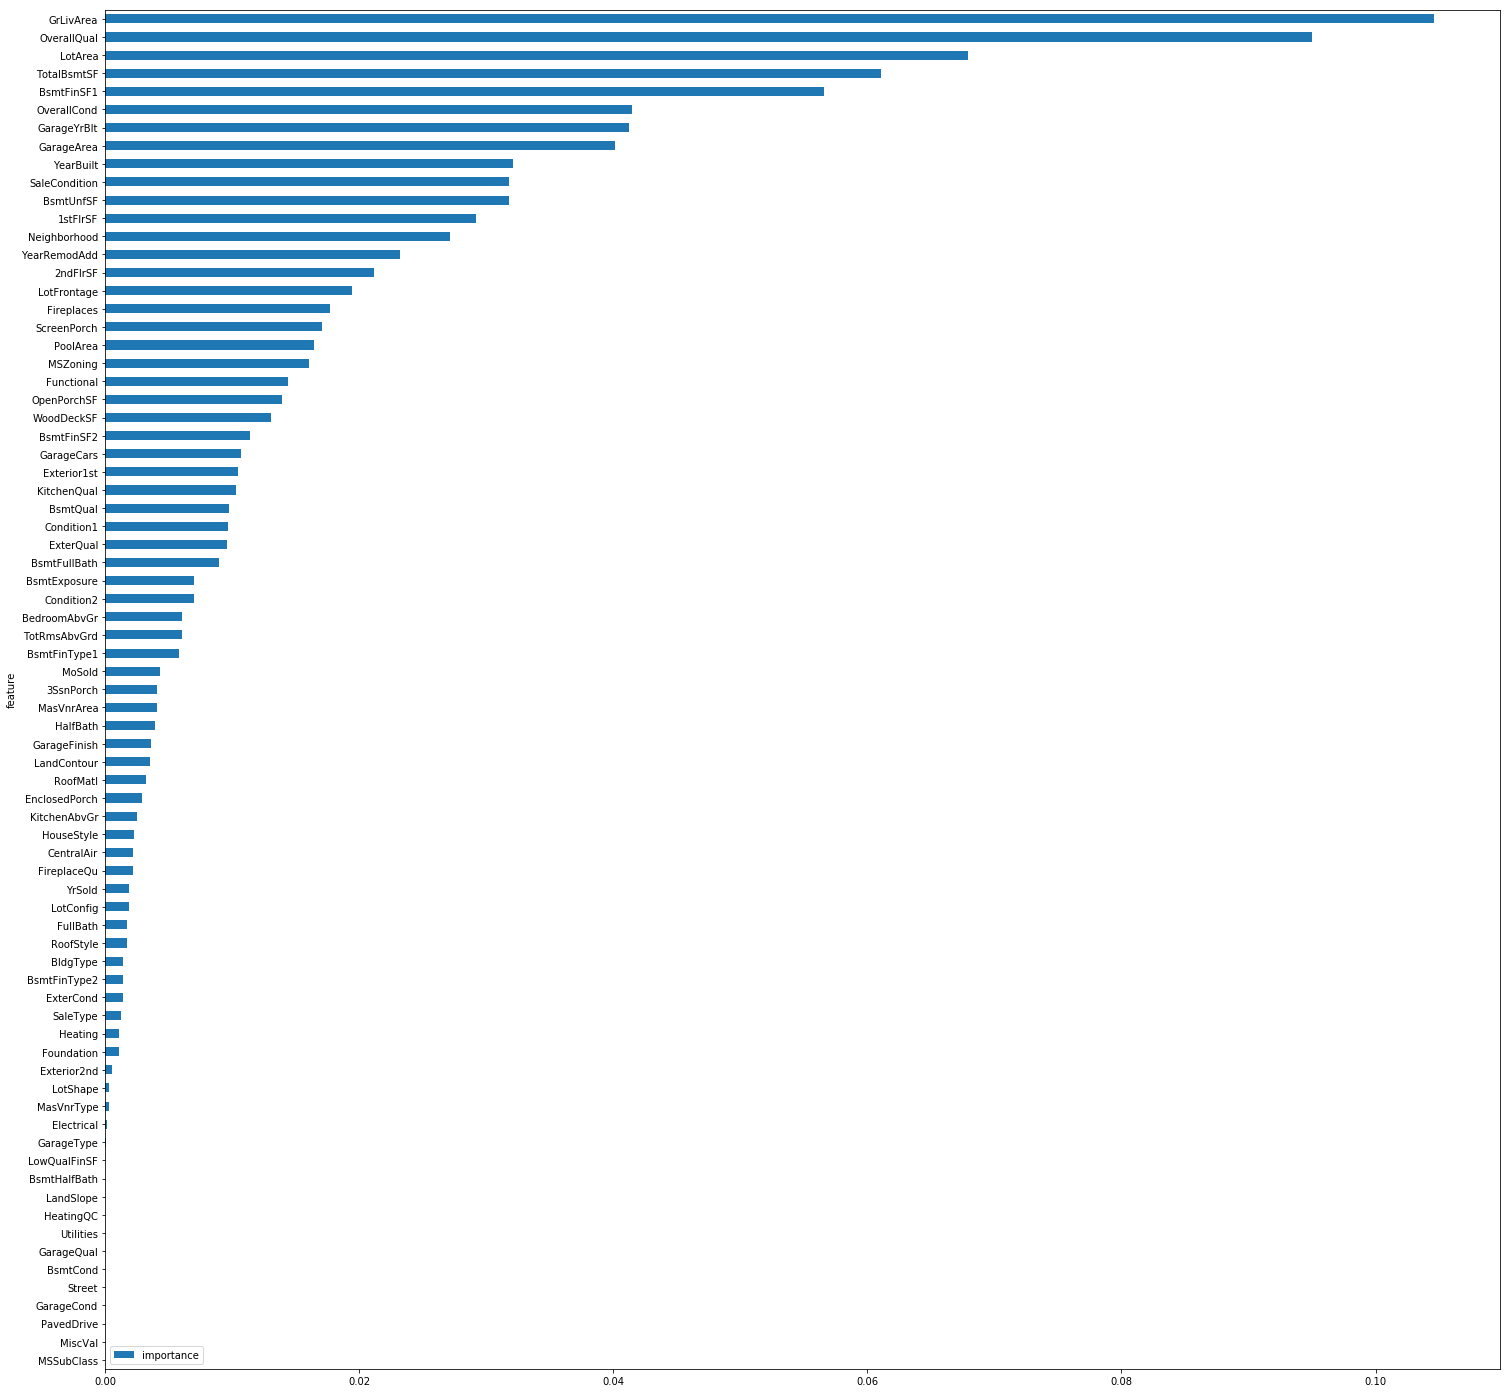

In [61]:
print(f"** before reduced = {cv}")
features = pd.DataFrame()
features['feature'] = train_df.columns
features['importance'] = rdf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(25, 25))
model = SelectFromModel(rdf, prefit=True)
train_reduced = model.transform(train_df)
test_reduced = model.transform(test_df)
print("reduced shape", train_reduced.shape, test_reduced.shape)
cv = cross_val_score(GradientBoostingRegressor(), train_reduced, y, cv=cross_validation_folds, n_jobs=n_jobs, verbose=1)
print("baseline model with random forest, performance = {}".format(cv))
print(f"** after reduced = {cv}")

In [55]:
y_pred = rdf.predict(test_df)
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": y_pred
})
submission.to_csv('house_price_result_baseline_random_forest_all_nan_filled.csv', index=False)

In [56]:
! kaggle competitions submit house-prices-advanced-regression-techniques -f house_price_result_baseline_random_forest_all_nan_filled.csv \
-m "baseline model with gradient boosting, feature engineer and nan processed"

Successfully submitted to House Prices: Advanced Regression Techniques

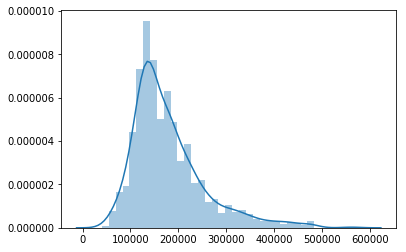

In [54]:
sns.distplot(y_pred)